In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt

C:\Users\yavnv\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [3]:
crypto_currency = 'ADA'
against_currency = 'USD'

In [4]:
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

In [5]:
start

datetime.datetime(2019, 1, 1, 0, 0)

In [6]:
data = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
#Prepare the data
#print(data.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-01  0.040984  0.042547  0.040308  0.042547   0.042547  14962902
2019-01-02  0.042568  0.045563  0.041982  0.045258   0.045258  24151526
2019-01-03  0.045106  0.045259  0.042535  0.042682   0.042682  21126963
2019-01-04  0.042629  0.044092  0.042477  0.043812   0.043812  16024029
2019-01-05  0.043659  0.045570  0.043350  0.044701   0.044701  25100965


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [9]:
prediction_days = 60

In [10]:
x_train, y_train = [],[]

In [11]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
#Create the neural network - the model for prediction
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)



Epoch 1/25

57/57 [==============================] - 18s 106ms/step - loss: 0.0078
Epoch 2/25
57/57 [==============================] - 6s 107ms/step - loss: 0.0030
Epoch 3/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0027
Epoch 4/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0026
Epoch 5/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0017
Epoch 6/25
57/57 [==============================] - 6s 105ms/step - loss: 0.0017
Epoch 7/25
57/57 [==============================] - 6s 105ms/step - loss: 0.0016
Epoch 8/25
57/57 [==============================] - 6s 105ms/step - loss: 0.0017
Epoch 9/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0017
Epoch 10/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0016
Epoch 11/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0014
Epoch 12/25
57/57 [==============================] - 6s 106ms/step - loss: 0.0014
Epoch 13/25
57/57 [==

In [14]:
# Testing the model

test_start = dt.datetime(2022,1,1)
test_end = dt.datetime.now()

test_data = yf.download(f'{crypto_currency}-{against_currency}', start=test_start, end=test_end)
actual_prices = test_data['Close'].values

[*********************100%%**********************]  1 of 1 completed


In [15]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [16]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [17]:
x_test = []

In [19]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [20]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

25/25 [==============================] - 1s 33ms/step


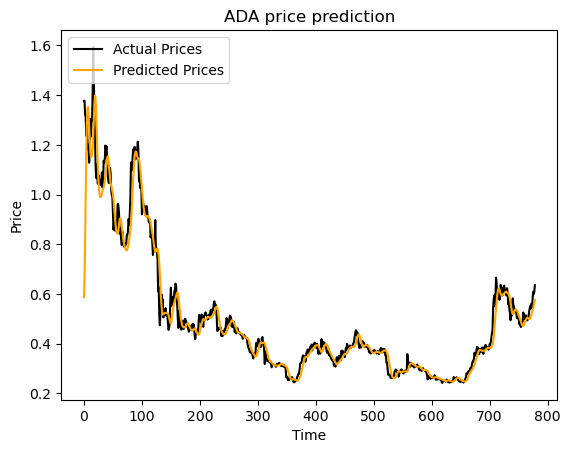

In [23]:
plt.plot(actual_prices, color='black', label = 'Actual Prices')
plt.plot(prediction_prices, color='orange', label = 'Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [29]:
actual_prices_list = actual_prices.flatten()
prediction_prices_list = prediction_prices.flatten()

In [30]:
ADA_data = pd.DataFrame({
    'Actual Prices' : actual_prices_list,
    'Prediction Prices' : prediction_prices_list
})

In [27]:
ADA_data.to_csv(r'C:\Users\yavnv\OneDrive\Desktop\AIML\AI Projects\Crypto Predictor AI\ADA_data.csv')

numpy.ndarray